In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [164]:
df=pd.read_csv('data_tesla.csv', index_col='customerID')
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [165]:
df.shape # check number of rows and columns

(7043, 20)

In [166]:
df.isnull() # look for missing, null, NaN records

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5575-GNVDE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3668-QPYBK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7795-CFOCW,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9237-HQITU,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2234-XADUH,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4801-JZAZL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [167]:
df.isnull().values.any() # determine if value in series missing

False

In [168]:
df.isnull().sum() # how many missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

1.2 Find outliers

In [169]:
sorted(df) # sort the data

['Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MonthlyCharges',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'gender',
 'tenure']

In [170]:
columns=['Churn',
         'Contract',
         'Dependents',
         'DeviceProtection',
         'InternetService',
         'MonthlyCharges',
         'MultipleLines',
         'OnlineBackup',
         'OnlineSecurity',
         'PaperlessBilling',
         'Partner',
         'PaymentMethod',
         'PhoneService',
         'SeniorCitizen',
         'StreamingMovies',
         'StreamingTV',
         'TechSupport',
         'TotalCharges',
         'gender',
         'tenure']

In [171]:
# Find outliers

Q1=df[columns].quantile(0.25)
Q3=df[columns].quantile(0.75)
print(Q1)
print(Q3)

MonthlyCharges    35.5
SeniorCitizen      0.0
tenure             9.0
Name: 0.25, dtype: float64
MonthlyCharges    89.85
SeniorCitizen      0.00
tenure            55.00
Name: 0.75, dtype: float64


In [172]:
# transform all data to numeric

df['gender'] = pd.factorize(df.gender)[0]
df['Partner'] = pd.factorize(df.Partner)[0]
df['Dependents'] = pd.factorize(df.Dependents)[0]
df['PhoneService'] = pd.factorize(df.PhoneService)[0]
df['MultipleLines'] = pd.factorize(df.MultipleLines)[0]
df['InternetService'] = pd.factorize(df.InternetService)[0]
df['OnlineSecurity'] = pd.factorize(df.OnlineSecurity)[0]
df['OnlineBackup'] = pd.factorize(df.OnlineBackup)[0]
df['DeviceProtection'] = pd.factorize(df.DeviceProtection)[0]
df['TechSupport'] = pd.factorize(df.TechSupport)[0]
df['StreamingTV'] = pd.factorize(df.StreamingTV)[0]
df['StreamingMovies'] = pd.factorize(df.StreamingMovies)[0]
df['Contract'] = pd.factorize(df.Contract)[0]
df['PaperlessBilling'] = pd.factorize(df.PaperlessBilling)[0]
df['PaymentMethod'] = pd.factorize(df.PaymentMethod)[0]
df['Churn'] = pd.factorize(df.Churn)[0]

In [173]:
df.head(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
5575-GNVDE,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
3668-QPYBK,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
7795-CFOCW,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
9237-HQITU,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
9305-CDSKC,0,0,1,0,8,1,2,1,0,1,1,0,1,1,0,0,0,99.65,820.5,1
1452-KIOVK,1,0,1,1,22,1,2,1,0,0,0,0,1,0,0,0,3,89.10,1949.4,0
6713-OKOMC,0,0,1,0,10,0,0,0,1,1,0,0,0,0,0,1,1,29.75,301.9,0


In [174]:
# Find outliers after numeric all data (just in case)

Q1=df[columns].quantile(0.25)
Q3=df[columns].quantile(0.75)
print(Q1)
print(Q3)

Churn                0.0
Contract             0.0
Dependents           0.0
DeviceProtection     0.0
InternetService      0.0
MonthlyCharges      35.5
MultipleLines        1.0
OnlineBackup         0.0
OnlineSecurity       0.0
PaperlessBilling     0.0
Partner              0.0
PaymentMethod        0.0
PhoneService         1.0
SeniorCitizen        0.0
StreamingMovies      0.0
StreamingTV          0.0
TechSupport          0.0
gender               0.0
tenure               9.0
Name: 0.25, dtype: float64
Churn                1.00
Contract             1.00
Dependents           1.00
DeviceProtection     1.00
InternetService      1.00
MonthlyCharges      89.85
MultipleLines        2.00
OnlineBackup         1.00
OnlineSecurity       1.00
PaperlessBilling     1.00
Partner              1.00
PaymentMethod        2.00
PhoneService         1.00
SeniorCitizen        0.00
StreamingMovies      1.00
StreamingTV          1.00
TechSupport          1.00
gender               1.00
tenure              55.00
Name

2. List all types of data, numeric, categorical, text.

In [175]:
df_for_type=pd.read_csv('data_tesla.csv', index_col='customerID')

In [176]:
df_for_type.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [177]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [178]:
df_for_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

SeniorCitizen - int64 (it is categorical as showing status)
tenure - int64 (numeric)
MonthlyCharges - float64
all the other - object (categorical)
customerID - using as ID, but actually it is a string of numbers and words

3. Perform EDA on data

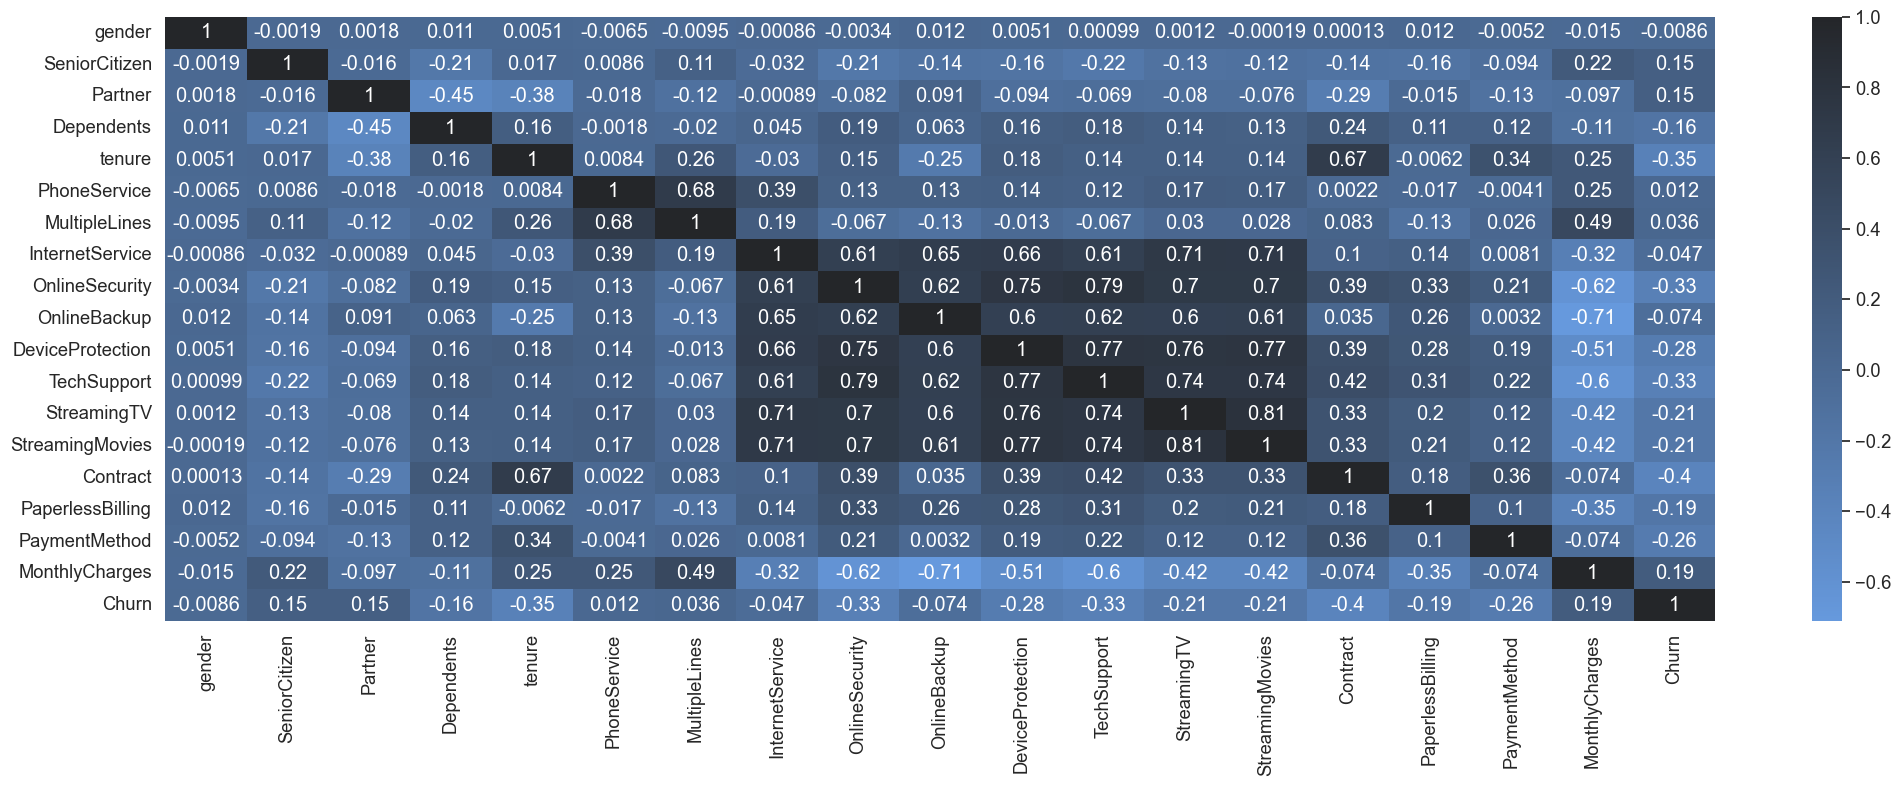

In [191]:
# Correlation between variables

cor = df.corr()
clrmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=clrmap, annot=True)
sns.set(rc={'figure.figsize':(24,8)},font_scale=1.2)

MonthlyCharges SeniorCitizen Partner is TOP3 values connect to Churn.


4. Split the dataset into training and test datasets (80/20 ratio)

Using SweetViz’s ‘compare’ command
contrast the training

In [180]:
import sweetviz as sv

In [181]:
advert_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [182]:
advert_report.show_html('Advertising.html')

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [183]:
df1 = sv.compare(df[5634:], df[:5634])
df1.show_html('Compare.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [184]:
X_train, X_test, y_train, y_test = train_test_split(df['Churn'], df['MonthlyCharges'], test_size=0.2, random_state=0)

In [185]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (5634,)
X_test :  (1409,)
y_train :  (5634,)
y_test :  (1409,)


5. Limitations

The dataset have full review, which given us all information about objects. After check, there is non NULL or missed values.
Categories of partnership can help to upgrade loyalty system, while address of person can help in service managment. Data about billing can be helpfull in automation of service